In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

importing data

In [2]:
data=pd.read_csv("G:\data_analysis\state_level_latest.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   State              38 non-null     object
 1   Confirmed          38 non-null     int64 
 2   Recovered          38 non-null     int64 
 3   Deaths             38 non-null     int64 
 4   Active             38 non-null     int64 
 5   Last_Updated_Time  38 non-null     object
 6   Migrated_Other     38 non-null     int64 
 7   State_code         38 non-null     object
 8   Delta_Confirmed    38 non-null     int64 
 9   Delta_Recovered    38 non-null     int64 
 10  Delta_Deaths       38 non-null     int64 
 11  State_Notes        15 non-null     object
dtypes: int64(8), object(4)
memory usage: 3.0+ KB


In [4]:
data.drop(["Last_Updated_Time","Migrated_Other","State_code","Delta_Confirmed","Delta_Recovered","Delta_Deaths","State_Notes"], axis=1, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State      38 non-null     object
 1   Confirmed  38 non-null     int64 
 2   Recovered  38 non-null     int64 
 3   Deaths     38 non-null     int64 
 4   Active     38 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.4+ KB


# national data

In [6]:
India=data.loc[0]


In [7]:
India.loc["recovary rate"]=(India.Recovered)/(India.Confirmed)
India.loc["death rate"]=(India.Deaths)/(India.Confirmed)
India

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


State                Total
Confirmed          2025409
Recovered          1377384
Deaths               41638
Active              605933
recovary rate     0.680052
death rate       0.0205578
Name: 0, dtype: object

# states data 

In [46]:
states=data.drop([0])

recovery=[]
death=[]
confirm=[]
for i in states.iterrows():
    
    confirmed=i[1][1]
    recovered=i[1][2]
    deaths=i[1][3]
    
    confirm.append(confirmed)
    
    if confirmed==0:
        
        r_rate=0
        d_rate=0
        
    else:
        r_rate=recovered/confirmed
        d_rate=deaths/confirmed
    
    recovery.append(r_rate)
    death.append(d_rate)
 


states["Recovery rate"]=np.array(recovery)
states["Death rate"]=np.array(death)


    
    



    
    


[479779, 279144, 141531, 158254, 196789, 108974, 67811, 86754, 73050, 48996, 68148, 39303, 52818, 36564, 40717, 23454, 30449, 20891, 15756, 11020, 8623, 7614, 5740, 4621, 3217, 3047, 1595, 2580, 1948, 1327, 1415, 990, 829, 538, 1123, 0, 0]


# confirmed cases

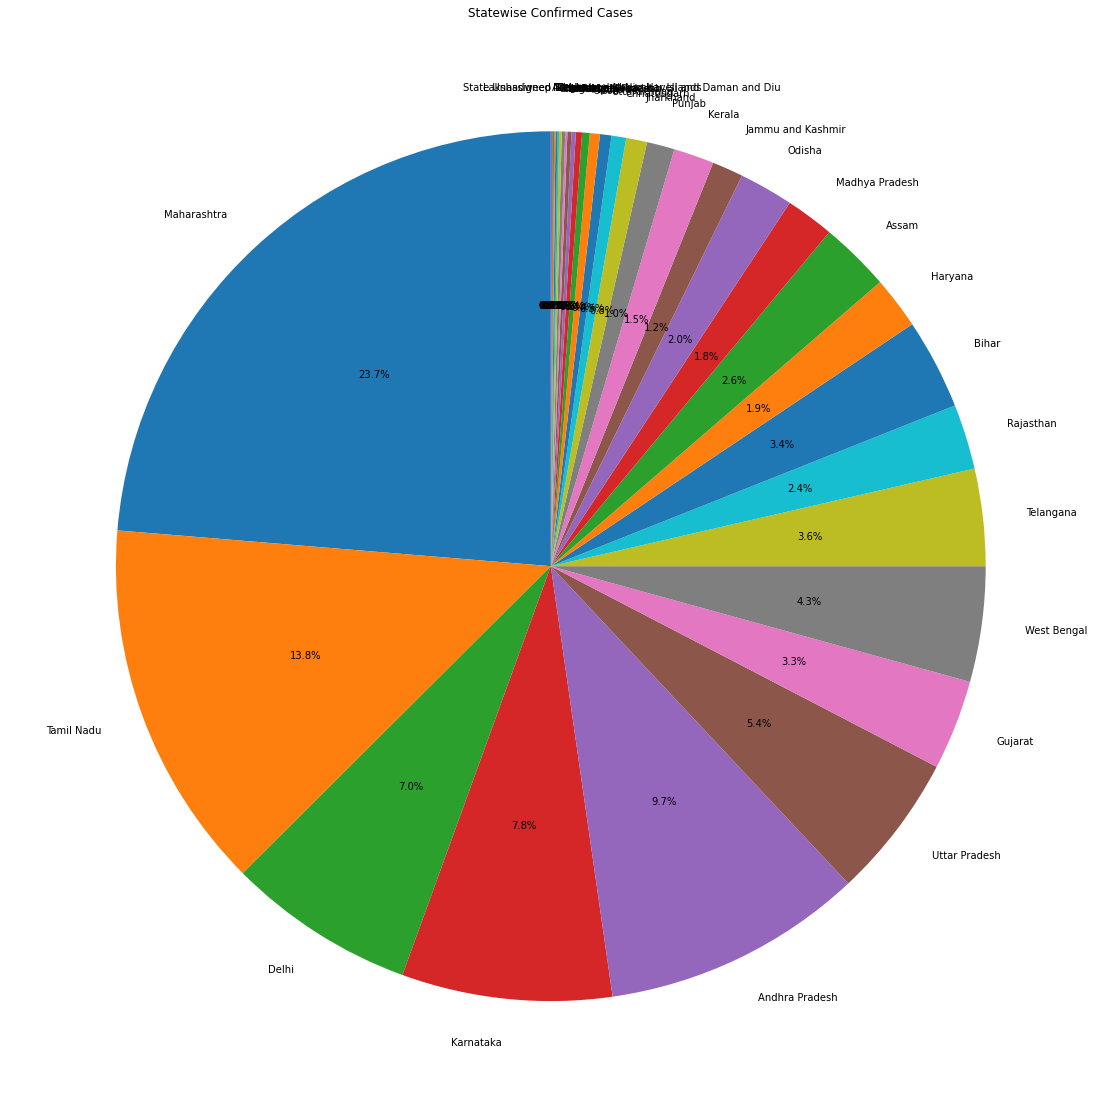

In [9]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 20]
state_data=states["State"]
confirm_data=states["Confirmed"]
plt.pie(confirm_data, labels=state_data,autopct='%1.1f%%', startangle=90)
plt.title("Statewise Confirmed Cases")
plt.show()

# statewise recovery rate

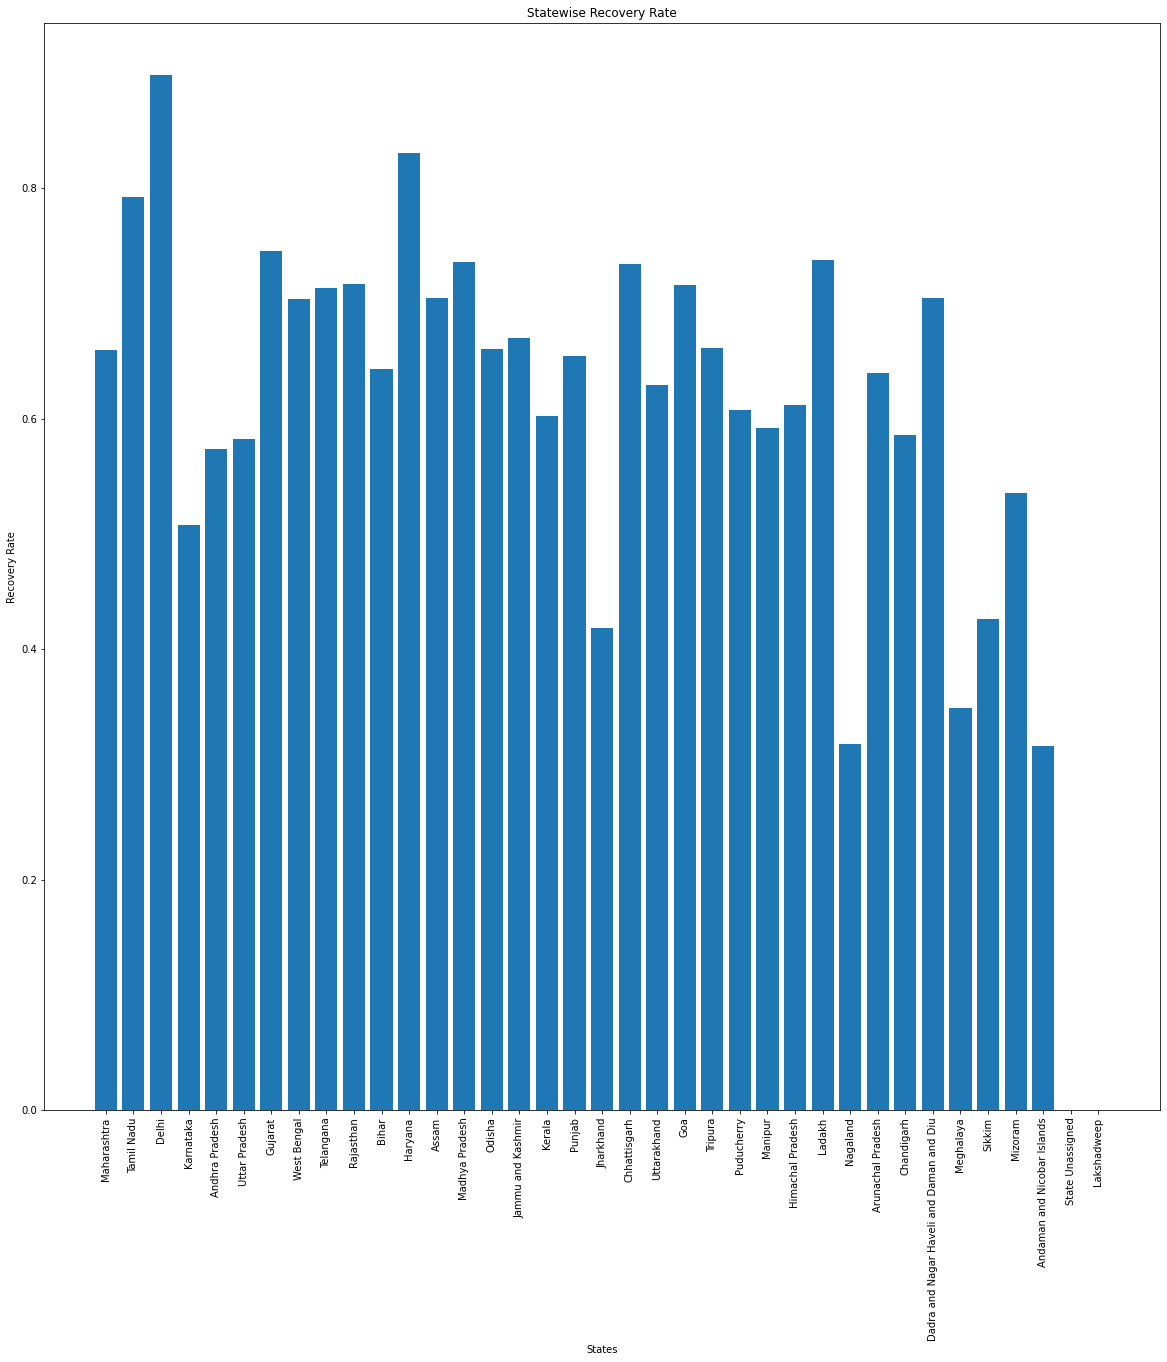

In [44]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 20]
state_data=states["State"]
recover_data=states["Recovery rate"]


        

plt.bar(state_data,recover_data)
plt.ylabel("Recovery Rate")
plt.xlabel("States")
plt.xticks(rotation=90)
plt.title("Statewise Recovery Rate")
plt.show()

# statewise death rate

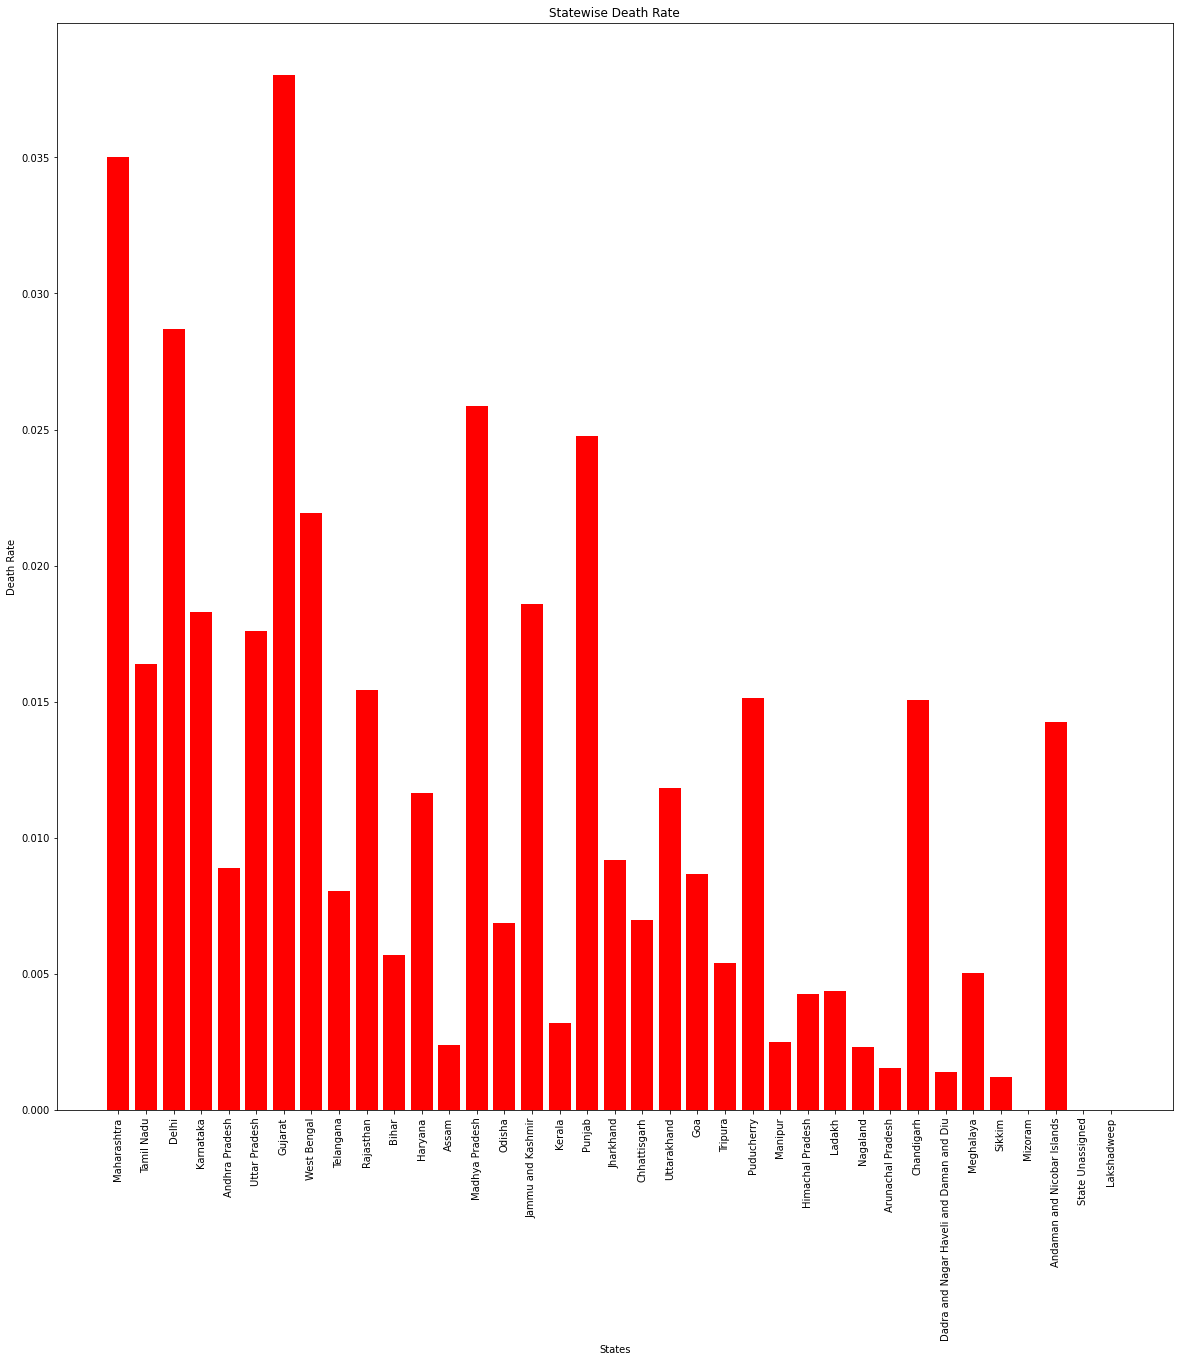

In [45]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 20]
state_data=states["State"]
death_data=states["Death rate"]
plt.bar(state_data,death_data,color="red")
plt.ylabel("Death Rate")
plt.xlabel("States")
plt.xticks(rotation=90)
plt.title("Statewise Death Rate")
plt.show()